<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd 
import psycopg2
import requests
from bs4 import BeautifulSoup 
import seaborn as sns 

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

conn_url = f'postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}'

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''SELECT count(*)    --количество всех вакансий
                    
                FROM public.vacancies    --таблица с вакансиями''' 

In [5]:
# результат запроса
pd.read_sql(query_3_1, conn_url) 

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''SELECT count(*)    --количество всех работодателей

                FROM public.employers    --таблица с работодателями'''

In [7]:
# результат запроса
pd.read_sql(query_3_2, conn_url)

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''SELECT count(*)    --количество всех регионов

                FROM public.areas    --таблица с регионами'''

In [9]:
# результат запроса
pd.read_sql(query_3_3, conn_url)

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''SELECT count(*)    --количество всех сфер деятельности

                FROM public.industries    --таблица со сферами деятельности'''

In [11]:
# результат запроса
pd.read_sql(query_3_4, conn_url)

,count
0,294


***

In [12]:
# выводы по предварительному анализу данных

Можно заметить, что число строк в таблицах быстро уменьшается. На мой взгляд, это проявление некой иерархии (или вложенности одного в другое). Одна сфера деятельности задействует несколько регионов, в одном регионе живут несколько работодателей, а один работодатель имеет несколько работников. 

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''SELECT count(*) cnt,    --количество вакансий 
                    a.name area    --название региона
                    
                FROM public.vacancies v
                JOIN public.areas a ON a.id = v.area_id
                GROUP BY area    --таблица с вакансиями и регионами
                
                ORDER BY {1} DESC    --сортировка по количеству вакансий'''

In [14]:
# результат запроса
pd.read_sql(query_4_1, conn_url) 

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''SELECT count(*)    --количество вакансий

                FROM public.vacancies v    --таблица с вакансиями
                
                WHERE v.salary_from IS NOT NULL 
                    OR v.salary_to IS NOT NULL    --условие, где должна быть указана хотя бы одна граница зарплаты'''

In [16]:
# результат запроса
pd.read_sql(query_4_2, conn_url)

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''SELECT avg(v.salary_from) avg_from,    --средний нижний конец зарплатной вилки
                    avg(v.salary_to) avg_to    --средний верхний конец зарплатной вилки
                    
                FROM public.vacancies v    --таблица с вакансиями'''

In [18]:
# результат запроса
pd.read_sql(query_4_3, conn_url).round()

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''SELECT count(*) cnt,    --количество вакансий
                    v.schedule,    --тип графика
                    v.employment    --тип занятости
                    
                FROM public.vacancies v
                GROUP BY v.schedule, v.employment    --таблица с вакансиями
                
                ORDER BY {1} DESC    --сортировка по количеству вакансий'''

In [20]:
# результат запроса
pd.read_sql(query_4_4, conn_url)

,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''SELECT v.experience,    --опыт работы
                    count(*) cnt    --количество вакансий
                    
                FROM public.vacancies v
                GROUP BY v.experience    --таблица с вакансиями
                
                ORDER BY {2}    --сортировка по количеству вакансий'''

In [22]:
# результат запроса
pd.read_sql(query_4_5, conn_url) 

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

In [23]:
# выводы по детальному анализу вакансий

В начале списка по количеству вакансий традиционно стоят самые крупные города, в то время как последние места занимают сёла или ПГТ. Также (примерно) только половина соискателей указывают границы желаемой зарплаты, а остальных вопрос оплаты труда не интересует. Но в среднем соискатели желают зарплату выше среднего (по России). Несравнимо больше людей ищет работу на полный день с полной занятостью, чем при других сочетаниях графика и типа занятости. А разница между катеориями опыта по количеству вакансий - примерно в 3 раза.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query_5_1 = f'''SELECT e.name,    --название компании
                    count(*) cnt    --количество компаний
                    
                FROM public.employers e
                JOIN public.vacancies v ON v.employer_id = e.id
                GROUP BY e.name    --таблица с работодателями и вакансиями
                
                ORDER BY {2} DESC    --сортировка по количеству вакансий
                
                LIMIT {5}    --пять самых популярных из них'''

In [25]:
# результат запроса
pd.read_sql(query_5_1, conn_url) 

,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_5_2 = f'''SELECT a.name area,    --название региона
                    count(v.name) v_cnt,    --количество вакансий
                    count(e.name) e_cnt    --количество работодателей
                    
                FROM public.areas a
                LEFT JOIN public.vacancies v ON a.id = v.area_id
                JOIN public.employers e ON a.id = e.area
                GROUP BY a.name    --таблица с регионами, вакансиями и работодателями
                
                HAVING count(v.id) = {0}    --условие, при котором в регионе нет вакансий
                
                ORDER BY {3} DESC    --сортировка по количеству работодателей'''

In [27]:
# результат запроса
pd.read_sql(query_5_2, conn_url) 

,area,v_cnt,e_cnt
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
181,Удобная,0,1
182,Майна (Ульяновская область),0,1
183,Верхнетуломский,0,1
184,Жаркент,0,1


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [28]:
# текст запроса
query_5_3 = f'''SELECT e.name,    --название работодателя
                    count(DISTINCT a.name) a_cnt    --количество регионов, где есть одна вакансия от работодателя
                    
                FROM public.employers e
                JOIN public.vacancies v ON v.employer_id = e.id
                JOIN public.areas a ON a.id = v.area_id
                GROUP BY e.name    --таблица с работодателями, вакансиями и регионами
                
                ORDER BY {2} DESC    --сортировка по количеству регионов'''

In [29]:
# результат запроса
pd.read_sql(query_5_3, conn_url) 

,name,a_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [30]:
# текст запроса
query_5_4 = f'''SELECT count(e.name)    --количество работодателей

                FROM public.employers e
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
                LEFT JOIN public.industries i ON i.id = ei.industry_id    --таблица с работодателями и сферами занятости
                
                WHERE i.name IS NULL    --условие, при котором указана сфера занятости'''

In [31]:
# результат запроса
pd.read_sql(query_5_4, conn_url) 

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [32]:
# текст запроса
query_5_5 = f'''SELECT e.name    --таблица с работодателями

                FROM public.employers e
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
                LEFT JOIN public.industries i ON i.id = ei.industry_id
                GROUP BY e.name    --таблица с работодателями и сферами деятельности
                
                HAVING count(i.name) = {4}    --условие, при котором должно быть указано 4 сферы деятельности
                
                OFFSET {2}
                LIMIT {1}    --третье место'''

In [33]:
# результат запроса
pd.read_sql(query_5_5, conn_url)

,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [34]:
# текст запроса
query_5_6 = f'''SELECT count(e.name)    --количество работодателей

                FROM public.employers e
                LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
                LEFT JOIN public.industries i ON i.id = ei.industry_id    --таблица с работодателями и сферами деятельности
                
                WHERE i.name = 'Разработка программного обеспечения'    --условие, при котором сфера деятельности должна быть указана как Разработка ПО'''

In [35]:
# результат запроса
pd.read_sql(query_5_6, conn_url) 

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [36]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser') # парсинг страницы

sities = []
for item in page.select('div#mw-content-text tr'):
    for city in item.select('td'):
        sities.append(city.text) # получение информации из таблицы с городами

sities = sities[3::5] # город - каждый пятый элемент списка после первых трех ненужных элементов

new_sities = []
for word in sities:
    if word == 'Воронеж[a]':
        new_sities.append('Воронеж')
    else:
        new_sities.append(word) # замена некорректно считавшейся строки

sities = tuple(new_sities[:16]) # в таблице всего 16 городов

sities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [37]:
# текст запроса
query_5_7 = f'''(SELECT a.name,    --название региона
                    count(a.name) cnt    --количество регионов
                    
                FROM public.employers e
                LEFT JOIN public.vacancies v ON v.employer_id = e.id
                LEFT JOIN public.areas a on v.area_id = a.id
                GROUP BY e.name, a.name    --таблица с работодателями, вакансиями и регионами
                
                HAVING e.name = 'Яндекс' 
                    AND a.name IN {sities})    --условие, при котором работодатель - компания Яндекс и регионы только из списка городов-миллиоников
                
                
                UNION ALL    --присоединение результирующей строки
                
                
                (SELECT 'Total',    --строка Total
                    count(a.name)    --количество всех городов-миллионников, где работу дает Яндекс
                    
                FROM public.employers e
                LEFT JOIN public.vacancies v ON v.employer_id = e.id
                LEFT JOIN public.areas a on v.area_id = a.id 
                
                WHERE e.name = 'Яндекс'
                    AND a.name IN {sities}) 
                
                
                ORDER BY {2} DESC    --сортировка по количеству вакансий'''

In [38]:
# результат запроса
pd.read_sql(query_5_7, conn_url)

,name,cnt
0,Total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


***

In [39]:
# выводы по анализу работодателей

В первой пятерке по количеству вакансий и регионов, в которых размещаются вакансии, Яндекс превышает сотальных примерно в 4 или 5 раз. Поскольку компании российские, логично, что (даже там, где нет вакансий) будет лидировать Россия. Также почти треть работодателей не указывают сферу своей деятельности, а единственная компания, у которой их 4 - это 2ГИС. Что касается городов-миллионников, в которых работает Яндекс, то эти города, по количеству вакансий в них располагаются вовсе не в порядке количества их населения. Чем это обусловлено, я не знаю, но деталь интересная.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [40]:
# текст запроса
query_6_1 = f'''SELECT count(name)    --количество вакансий

                FROM public.vacancies    --таблица с вакансиями
                
                WHERE lower(name) LIKE '%%data%%' 
                    OR lower(name) LIKE '%%данн%%'    --условие, при котором работа связана с данными'''  

In [41]:
# результат запроса
pd.read_sql(query_6_1, conn_url) 

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [42]:
# текст запроса
query_6_2 = f'''SELECT count(name)    --количество вакансий

                FROM public.vacancies    --таблица с вакансиями
                
                WHERE (lower(name) LIKE '%%data scientist%%' 
                    OR lower(name) LIKE '%%data science%%' 
                    OR lower(name) LIKE '%%исследователь данных%%' 
                    OR (name LIKE '%%ML%%' AND lower(name) NOT LIKE '%%html%%')
                    OR lower(name) LIKE '%%machine learning%%' 
                    OR lower(name) LIKE '%%машинн%%обучен%%')    --условие, при котором работа связана с Data Science
                    
                    AND (lower(name) LIKE '%%junior%%'
                    OR experience = 'Нет опыта' 
                    OR employment = 'Стажировка')    --условие, при котором работа подходит начинающему специалисту''' 

In [43]:
# результат запроса
pd.read_sql(query_6_2, conn_url) 

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [44]:
# текст запроса
query_6_3 = f'''SELECT count(name)    --количество вакансий

                FROM public.vacancies    --таблица с вакансиями
                
                WHERE (lower(name) LIKE '%%data scientist%%' 
                    OR lower(name) LIKE '%%data science%%' 
                    OR lower(name) LIKE '%%исследователь данных%%' 
                    OR (name LIKE '%%ML%%' AND lower(name) NOT LIKE '%%html%%')
                    OR lower(name) LIKE '%%machine learning%%' 
                    OR lower(name) LIKE '%%машинн%%обучен%%')    --условие, при котором работа связана с Data Science
                    
                    AND (lower(key_skills) LIKE '%%sql%%'
                    OR lower(key_skills) LIKE '%%postgres%%')    --условие, при котором работа требует знания SQL''' 

In [45]:
# результат запроса
pd.read_sql(query_6_3, conn_url) 

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [46]:
# текст запроса
query_6_4 = f'''SELECT count(name)    --количество вакансий

                FROM public.vacancies    --таблица с вакансиями
                
                WHERE (lower(name) LIKE '%%data scientist%%' 
                    OR lower(name) LIKE '%%data science%%' 
                    OR lower(name) LIKE '%%исследователь данных%%' 
                    OR (name LIKE '%%ML%%' AND lower(name) NOT LIKE '%%html%%')
                    OR lower(name) LIKE '%%machine learning%%' 
                    OR lower(name) LIKE '%%машинн%%обучен%%')    --условие, при котором работа связана с Data Science
                    
                    AND lower(key_skills) LIKE '%%python%%'    --условие, при котором работа требует знания Python''' 

In [47]:
# результат запроса
pd.read_sql(query_6_4, conn_url) 

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [48]:
# текст запроса
query_6_5 = f'''SELECT avg(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1) avgskills    --среднее количество указанных навыков

                FROM public.vacancies    --таблица с вакансиями
                
                WHERE (lower(name) LIKE '%%data scientist%%' 
                    OR lower(name) LIKE '%%data science%%' 
                    OR lower(name) LIKE '%%исследователь данных%%' 
                    OR (name LIKE '%%ML%%' AND lower(name) NOT LIKE '%%html%%')
                    OR lower(name) LIKE '%%machine learning%%' 
                    OR lower(name) LIKE '%%машинн%%обучен%%')    --условие, при котором работа связана с Data Science''' 

In [49]:
# результат запроса
pd.read_sql(query_6_5, conn_url).round(2) 

,avgskills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [50]:
# текст запроса
query_6_6 = f'''SELECT experience,    --опыт работы
                avg(coalesce((salary_to + salary_from)/2, salary_to, salary_from))    --средняя зарплата
                
                FROM public.vacancies    --таблица с вакансиями
                
                WHERE (lower(name) LIKE '%%data scientist%%' 
                    OR lower(name) LIKE '%%data science%%' 
                    OR lower(name) LIKE '%%исследователь данных%%' 
                    OR (name LIKE '%%ML%%' AND lower(name) NOT LIKE '%%html%%')
                    OR lower(name) LIKE '%%machine learning%%' 
                    OR lower(name) LIKE '%%машинн%%обучен%%')    --условие, при котором работа связана с Data Science
                    
                    AND (salary_from IS NOT NULL 
                    OR salary_to IS NOT NULL)    --таблица с вакансиями
                
                GROUP BY experience''' 

In [51]:
# результат запроса
pd.read_sql(query_6_6, conn_url).round()

,experience,avg
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

In [52]:
# выводы по предметному анализу

Среди всех вакансий довольно мало тех, которые относятся к работе с данными (всего 0,036), а тех, что подходят начинающему специалисту в этой области - еще намного меньше. Умение программировать на Python более востребовано для работы с данными, чем знание SQL, однако в работе требуются оба навыка, так как в среднем от соискателя требуется примерно 6 или 7 навыков. По признаку опыта работы средняя зарплата возрастает примерно в пропорции 1 : 2 : 3,5 (числа взяты на глаз). 

# Общий вывод по проекту

In [53]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, 
# продумать варианты продолжения исследования

In [55]:
# средняя зарплата по регионам 

query_6_7 = f'''SELECT a.name,    --название региона
                avg(coalesce((v.salary_to + v.salary_from)/2, v.salary_to, v.salary_from))    --средняя зарплата
                
                FROM public.vacancies v
                JOIN public.areas a ON a.id = v.area_id    --таблица с вакансиями
                
                WHERE salary_from IS NOT NULL 
                    OR salary_to IS NOT NULL    --условие, где должна быть указана хотя бы одна граница зарплаты
                    
                GROUP BY a.name
                
                ORDER BY {2} DESC    --сортировка по средней зарплате''' 

avgsalary = pd.read_sql(query_6_7, conn_url).round()

avgsalary

,name,avg
0,Германия,452751.0
1,Болгария,324348.0
2,Испания,300000.0
3,Черногория,288589.0
4,Литва,263018.0
...,...,...
666,Урень,13800.0
667,Ош,12743.0
668,Кобрин,12389.0
669,Степногорск,12205.0


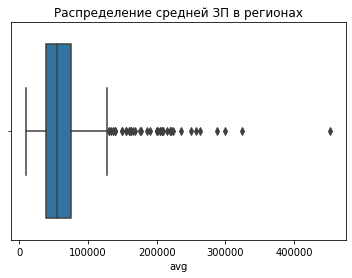

In [66]:
# график распределения avgsalary

avgsal_plot = sns.boxplot(data=avgsalary, x='avg').set_title("Распределение средней ЗП в регионах")

Как и ожидалось по средней зарплате, в начале списка (или "топа") будут страны Европы, хотя и Болгария, Черногория и Литва считаются бедными в ЕС. На последних же местах находятся города и села бывшего СССР. А из графика видно, что основная часть желаемых зарплат не превышают 150 тысяч, а большинство и вовсе почти посередине между 0 и 100 тысячами. Однако, в то же время на графике показано довольно много выбросов. Это вероятно связано с тем, что в нашей выборке высококвалифицированных специалистов ничтожно мало, чем работников более низкой квалификации, чыи профессии оплачиваютя явно неравно. 

**ОБЩИЙ ВЫВОД**

На мой взгляд ситуация на рынке вакансий, которую я исследовал в этом проекте, не является оргигинальной или из ряда вон выходящей. Я получил те ответы, которые я ожидал получить, все предполагаемые закономерности соблюдены. Например, что больше всего вакансий будет в крупных городах или у больших компаний. Это значит, что эти данные хорошо подойдут для машинного обучения и создания качественной модели. 